In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
result_Y = np.load("./drive/MyDrive/Tutoring/duck_Y_sequence.npy")
result_X = np.load("./drive/MyDrive/Tutoring/duck_X_sequence.npy")

# 01 Plotting

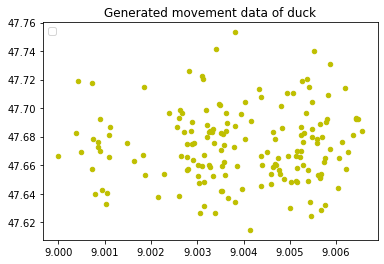

In [40]:
# Plot
plt.scatter(result_X, result_Y, s=20, c='y', marker='o')
plt.title('Generated movement data of duck')
plt.legend(loc=2)
plt.show()

# 02 Clustering

## 2-1 Real data vs. Generated data

In [41]:
rawdata = pd.read_csv("./drive/MyDrive/Tutoring/Lake_Constance_Ducks_XY.csv", encoding='CP949') # if you want to use another animal data, you can change this line

real = rawdata.dropna().to_numpy()
generated = np.c_[result_X, result_Y]

In [ ]:
real.shape

(1283, 2)

In [ ]:
generated.shape

(168, 2)

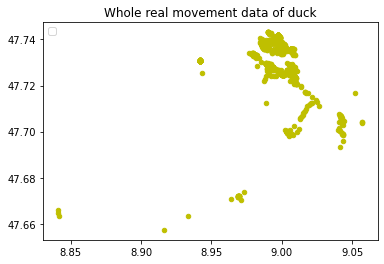

In [42]:
# Plot
plt.scatter(real[:, 0], real[:, 1], s=20, c='y', marker='o')
plt.title('Whole real movement data of duck')
plt.legend(loc=2)
plt.show()

In [45]:
# sample real data (sampling number = generated data)
#real_sampled = real[np.random.choice(real.shape[0], generated.shape[0], replace=False), :]
real_sampled = real[0:168,:]

In [46]:
real_sampled.shape

(168, 2)

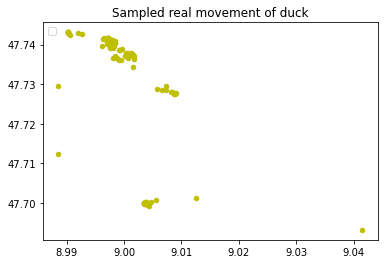

In [48]:
# Plot
plt.scatter(real_sampled[:, 0], real_sampled[:, 1], s=20, c='y', marker='o')
plt.title('Sampled real movement of duck')
plt.legend(loc=2)
plt.show()

In [49]:
data_sampled = np.concatenate((real_sampled, generated), axis = 0)

In [50]:
data_sampled.shape

(336, 2)

In [ ]:
data_sampled

array([[ 8.996873  , 47.7411755 ],
       [ 8.9863015 , 47.7376374 ],
       [ 9.0010972 , 47.7247177 ],
       [ 8.9868239 , 47.7361942 ],
       [ 9.0417017 , 47.7041184 ],
       [ 8.9861858 , 47.7377647 ],
       [ 8.9971372 , 47.7417056 ],
       [ 8.9861259 , 47.7376795 ],
       [ 9.0063374 , 47.7357136 ],
       [ 8.99069   , 47.7273559 ],
       [ 9.0063099 , 47.7358479 ],
       [ 8.987117  , 47.7360721 ],
       [ 8.9925032 , 47.7282366 ],
       [ 8.9971608 , 47.7420713 ],
       [ 8.9972514 , 47.7416258 ],
       [ 8.9931613 , 47.739191  ],
       [ 8.9947682 , 47.7359379 ],
       [ 8.9810173 , 47.7330486 ],
       [ 9.001053  , 47.7246856 ],
       [ 8.9975743 , 47.7411409 ],
       [ 9.0064885 , 47.7356374 ],
       [ 9.0041935 , 47.6995126 ],
       [ 8.9921599 , 47.728116  ],
       [ 8.9976637 , 47.7411346 ],
       [ 8.9972394 , 47.7415829 ],
       [ 9.009684  , 47.7264064 ],
       [ 9.0422425 , 47.7062188 ],
       [ 8.9419083 , 47.7308372 ],
       [ 9.0265608 ,

In [51]:
# scaling
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_sampled.reshape(-1,1)).reshape(-1,2)
# data_scaled_X = min_max_scaler.fit_transform(data_sampled[:,0].reshape(-1,1))
# data_scaled_Y = min_max_scaler.fit_transform(data_sampled[:,1].reshape(-1,1))
# data_scaled = np.c_[data_scaled_X, data_scaled_Y]

In [52]:
data_scaled

array([[4.84515228e-04, 9.99385963e-01],
       [4.68242702e-04, 9.99365122e-01],
       [4.84283058e-04, 9.99362798e-01],
       [4.46225263e-04, 9.99366079e-01],
       [5.09339343e-04, 9.99352327e-01],
       [5.23202462e-04, 9.99336862e-01],
       [5.23782886e-04, 9.99337344e-01],
       [5.23561035e-04, 9.99339859e-01],
       [5.30704127e-04, 9.99345728e-01],
       [5.11919008e-04, 9.99348646e-01],
       [5.12246625e-04, 9.99347490e-01],
       [3.37820008e-04, 9.99514683e-01],
       [2.23956182e-04, 9.99700615e-01],
       [2.24332813e-04, 9.99701704e-01],
       [2.23030082e-04, 9.99700081e-01],
       [2.24345711e-04, 9.99700096e-01],
       [2.24815210e-04, 9.99699947e-01],
       [2.09639042e-04, 9.99697230e-01],
       [1.99942082e-04, 9.99692125e-01],
       [2.30126740e-04, 9.99688215e-01],
       [2.47828400e-04, 9.99681967e-01],
       [2.47508522e-04, 9.99635071e-01],
       [2.71953426e-04, 9.99622345e-01],
       [2.34403824e-04, 9.99688491e-01],
       [2.553790

In [59]:
## color setting
# you should change i to change 'k' in k mean clustering
i = 0 # i = 0 for k = 2
color_num = i+2

colors = plt.cm.tab10(np.arange(color_num, dtype=int)) #matplotlib colormap google it!

## K mean clustering
model=KMeans(init="random", n_clusters=i+2 ,n_init=10,max_iter=300,random_state=42)
cluster_labels=model.fit_predict(data_scaled)

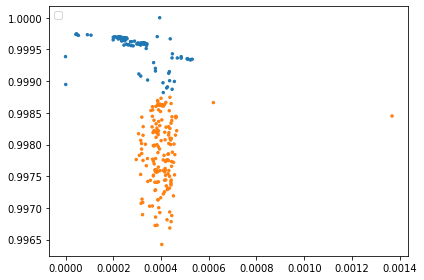

In [60]:
plt.figure(figsize=(6, 4))

# scatter plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=6, color=colors[cluster_labels])
plt.legend(loc=2)
plt.tight_layout()

In [55]:
real_labels = np.r_[np.repeat(1, real_sampled.shape[0]), np.repeat(0, generated.shape[0])] # real data for label 1

In [56]:
real_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [61]:
count = 0
for i in zip(real_labels, cluster_labels):
  if i[0] == i[1]:
    count+=1
  else:
    pass
print('Accuracy of distinguishing real data and generated data is:', count/real_labels.shape[0])

Accuracy of distinguishing real data and generated data is: 0.20535714285714285


## 2-2 Random data vs. Generated data

In [62]:
random_seq = np.random.randn(168, 2) #normal distribution

In [63]:
# random_scaled_X = min_max_scaler.fit_transform(random_seq[:,0].reshape(-1,1))
# random_scaled_Y = min_max_scaler.fit_transform(random_seq[:,1].reshape(-1,1))
# random_scaled = np.c_[random_scaled_X, random_scaled_Y]

random_scaled = min_max_scaler.fit_transform(random_seq[:,0].reshape(-1,1)).reshape(-1, 2)

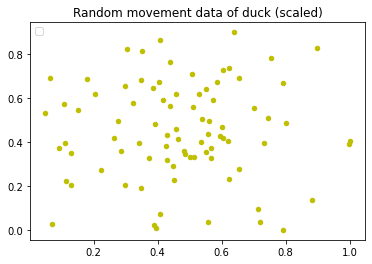

In [64]:
# Plot
plt.scatter(random_scaled[:, 0], random_scaled[:, 1], s=20, c='y', marker='o')
plt.title('Random movement data of duck (scaled)')
plt.legend(loc=2)
plt.show()

In [65]:
generated = np.c_[result_X, result_Y]

In [66]:
# generated_scaled_X = min_max_scaler.fit_transform(generated[:,0].reshape(-1,1))
# generated_scaled_Y = min_max_scaler.fit_transform(generated[:,1].reshape(-1,1))
# generated_scaled = np.c_[generated_scaled_X, generated_scaled_Y]

generated_scaled = min_max_scaler.fit_transform(generated.reshape(-1,1)).reshape(-1,2)

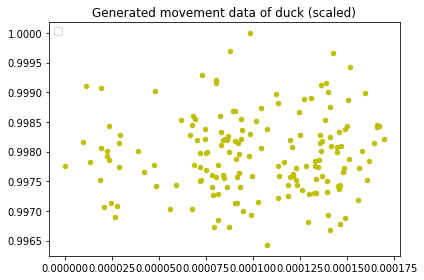

In [67]:
# Plot
plt.scatter(generated_scaled[:, 0], generated_scaled[:, 1], s=20, c='y', marker='o')
plt.title('Generated movement data of duck (scaled)')
plt.legend(loc=2)
plt.tight_layout()
plt.show()

In [68]:
data_scaled = np.concatenate((random_scaled, generated_scaled), axis = 0)

In [69]:
data_scaled

array([[5.12443791e-01, 3.30376346e-01],
       [5.57400608e-01, 3.64879535e-02],
       [6.04078471e-01, 4.17243410e-01],
       [5.30317352e-01, 6.17950264e-01],
       [6.02414234e-01, 4.69788144e-01],
       [5.73839670e-01, 5.88923098e-01],
       [4.37028504e-01, 7.62142847e-01],
       [7.01950622e-01, 5.55399090e-01],
       [6.04961872e-01, 7.25442479e-01],
       [4.49098504e-01, 2.88943060e-01],
       [3.92557060e-01, 4.80604802e-01],
       [5.39734319e-01, 5.06184258e-01],
       [4.07580150e-01, 8.62418308e-01],
       [2.83898605e-01, 3.60543268e-01],
       [4.29346787e-01, 4.33160067e-01],
       [4.56542456e-01, 4.61200896e-01],
       [6.37268013e-01, 8.99464654e-01],
       [9.99437945e-01, 3.90070845e-01],
       [9.24200066e-02, 3.74569533e-01],
       [4.62986239e-01, 4.13951955e-01],
       [6.23013307e-01, 2.33389221e-01],
       [4.56134591e-01, 6.18829050e-01],
       [6.23841049e-02, 6.90817383e-01],
       [3.03396644e-01, 8.20945889e-01],
       [5.562838

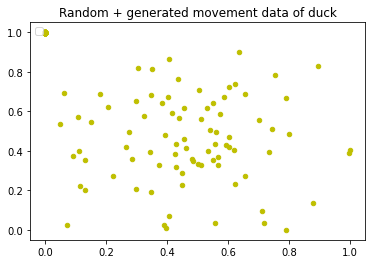

In [70]:
# Plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=20, c='y', marker='o')
plt.title('Random + generated movement data of duck')
plt.legend(loc=2)
plt.show()

In [71]:
## color setting
# you should change i to change 'k' in k mean clustering
i = 0 # i = 0 for k = 2
color_num = i+2

colors = plt.cm.tab10(np.arange(color_num, dtype=int))

## K mean clustering
model=KMeans(init="random", n_clusters=i+2 ,n_init=10,max_iter=300,random_state=42)
cluster_labels=model.fit_predict(data_scaled)

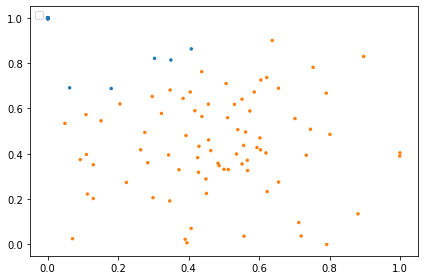

In [72]:
plt.figure(figsize=(6, 4))

# scatter plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=6, color=colors[cluster_labels])
plt.legend(loc=2)
plt.tight_layout()

In [81]:
real_labels = np.r_[np.repeat(1, random_seq.shape[0]), np.repeat(0, generated.shape[0])]

In [82]:
real_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [83]:
count = 0
for i in zip(real_labels, cluster_labels):
  if i[0] == i[1]:
    count+=1
  else:
    pass
print('Accuracy of distinguishing of random data and generated data is:', count/real_labels.shape[0])

Accuracy of distinguishing of random data and generated data is: 0.4851190476190476
